In [112]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display

# Problem 1

In [113]:
# First a few tools for this -particular- example...
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

## Load Data

In [114]:
def grab_image100(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

X = np.concatenate([grab_image('/nfshome/jms2dv/sandbox/xception_example/images/image_%d.JPEG'%(i)) for i in range(100)])
X.shape

(100, 100, 100, 3)

In [102]:
# 37 cats in there (label 1, and all else 0)
Y = np.loadtxt('/nfshome/sandbox/xception_example/class_labels.csv')
Y = keras.utils.to_categorical(Y)

#Y[0:10,:]

## Create Convolution Neural Network

In [119]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), # size of my 'sliding window' scanning my image.
                                activation='relu',
                                input_shape=[X.shape[1],
                                                X.shape[2],
                                                X.shape[3]]))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) # downsample previous grid

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
 
model.add(keras.layers.Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 33856)             0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               4333696   
_________________________________________________________________
dense_61 (Dense)             (None, 2)                 258       
Total para

In [120]:
batch_size = 20
epochs = 13
history = model.fit(X, Y,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_split = 0)
# 0 split size provides 37 cats in the training set,
# and 0 in the validation set...

Epoch 1/13
100/100 [==============================] - 27s 269ms/step - loss: 1.5176 - acc: 0.5000
Epoch 2/13
100/100 [==============================] - 5s 53ms/step - loss: 0.7186 - acc: 0.6200
Epoch 3/13
100/100 [==============================] - 5s 47ms/step - loss: 0.6008 - acc: 0.8200
Epoch 4/13
100/100 [==============================] - 2s 22ms/step - loss: 0.4892 - acc: 0.8000
Epoch 5/13
100/100 [==============================] - 4s 43ms/step - loss: 0.3111 - acc: 0.9200
Epoch 6/13
100/100 [==============================] - 2s 19ms/step - loss: 0.2403 - acc: 0.9400
Epoch 7/13
100/100 [==============================] - 2s 19ms/step - loss: 0.1308 - acc: 0.9500
Epoch 8/13
100/100 [==============================] - 4s 37ms/step - loss: 0.0596 - acc: 1.0000
Epoch 9/13
100/100 [==============================] - 4s 37ms/step - loss: 0.0347 - acc: 1.0000
Epoch 10/13
100/100 [==============================] - 2s 22ms/step - loss: 0.0207 - acc: 1.0000
Epoch 11/13
100/100 [================

## Training Accuracy

In [121]:
train_acc = history.history['acc']
print('Train accuracy:',train_acc[11])

Train accuracy: 1.0


# Problem 2

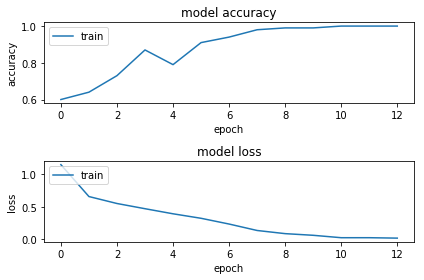

In [100]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()

# Problem 3

## Load Image Data

In [27]:
def grab_image299(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
X = np.concatenate([grab_image299('/nfshome/jms2dv/sandbox/xception_example/images/image_%d.JPEG'%(i)) for i in range(100)])
X.shape

(100, 299, 299, 3)

## Load Weights

In [28]:
# Load the model with weights
model = Xception(weights='imagenet')

## Print Top One Class For Each Image

In [29]:
for i in range(0,100):
    preds = model.predict(X[i:100,:,:,:])
    print('Predicted:', decode_predictions(preds, top=1)[0])

Predicted: [('n01817953', 'African_grey', 0.44841596)]
Predicted: [('n02106550', 'Rottweiler', 0.29953748)]
Predicted: [('n02395406', 'hog', 0.14157927)]
Predicted: [('n02101006', 'Gordon_setter', 0.3929784)]
Predicted: [('n02124075', 'Egyptian_cat', 0.57858574)]
Predicted: [('n02127052', 'lynx', 0.2734335)]
Predicted: [('n02107683', 'Bernese_mountain_dog', 0.97202796)]
Predicted: [('n02123394', 'Persian_cat', 0.55238414)]
Predicted: [('n02093256', 'Staffordshire_bullterrier', 0.4646181)]
Predicted: [('n02123045', 'tabby', 0.27875343)]
Predicted: [('n02123045', 'tabby', 0.24650945)]
Predicted: [('n02124075', 'Egyptian_cat', 0.21868071)]
Predicted: [('n02096585', 'Boston_bull', 0.12376172)]
Predicted: [('n02124075', 'Egyptian_cat', 0.59595346)]
Predicted: [('n02123597', 'Siamese_cat', 0.14436458)]
Predicted: [('n02107312', 'miniature_pinscher', 0.09950582)]
Predicted: [('n02106662', 'German_shepherd', 0.38143304)]
Predicted: [('n02123045', 'tabby', 0.47416684)]
Predicted: [('n04254680',